In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
# Remote data access for pandas
import pandas_datareader as webreader
# Mathematical functions 
import math 
# Fundamental package for scientific computing with Python
import numpy as np 
# Additional functions for analysing and manipulating data
import pandas as pd 
# Date Functions
from datetime import date, timedelta, datetime
# This function adds plotting functions for calender dates
from pandas.plotting import register_matplotlib_converters
# Important package for visualization - we use this to plot the market data
import matplotlib.pyplot as plt 
# Formatting dates
import matplotlib.dates as mdates
# Packages for measuring model performance / errors
from sklearn.metrics import mean_absolute_error, mean_squared_error

# This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
af=pd.read_csv("./data/rent_airbnb_all_features.csv")
af.head(2)

year     quarter  district_code district_name  neighbourhood_code  \
0  2015.0  2015-01-01            1.0  Ciutat Vella                 4.0   
1  2015.0  2015-04-01            1.0  Ciutat Vella                 4.0   

                      neighbourhood_name  price_month(€)  price_m2_month(€)  \
0  Sant Pere, Santa Caterina i la Ribera          697.16              11.51   
1  Sant Pere, Santa Caterina i la Ribera          708.03              12.02   

   From 6 months to 12 motnhs  Over 12 months  ...  woman_junior_high_school  \
0                      2949.0          8425.0  ...                    1464.0   
1                      2949.0          8425.0  ...                    1464.0   

   woman_senior_high_school  woman_unknown  woman_without education  \
0                    2067.0            5.0                    470.0   
1                    2067.0            5.0                    470.0   

   airbnb_price(€)  n_airbnb_listings  availability_365  \
0              NaN                NaN               NaN   
1          73.3433              903.0        262.921373   

   airbnb_ratio_business  airbnb_professional_ratio  airbnb_mega_host_ratio  
0                    NaN                        NaN                     NaN  
1               0.631229                   0.128461                0.016611  

[2 rows x 37 columns]

In [2]:
af.columns

Index(['year', 'quarter', 'district_code', 'district_name',
       'neighbourhood_code', 'neighbourhood_name', 'price_month(€)',
       'price_m2_month(€)', 'From 6 months to 12 motnhs', 'Over 12 months',
       'Up to 6 months', '1 Spanish', '1 foreigner', '2 Spanish',
       '2 foreigners', '3 Spanish', '3 foreigners', '4 espanyols o més',
       'more than 4 foreigners', 'man_bachelors_degree',
       'man_elementary_school', 'man_junior_high_school',
       'man_senior_high_school', 'man_unknown', 'man_without education',
       'woman_bachelors_degree', 'woman_elementary_school',
       'woman_junior_high_school', 'woman_senior_high_school', 'woman_unknown',
       'woman_without education', 'airbnb_price(€)', 'n_airbnb_listings',
       'availability_365', 'airbnb_ratio_business',
       'airbnb_professional_ratio', 'airbnb_mega_host_ratio'],
      dtype='object')

In [3]:
print(af.isna().sum())

year                            0
quarter                         0
district_code                   0
district_name                   0
neighbourhood_code              0
neighbourhood_name              0
price_month(€)                118
price_m2_month(€)             119
From 6 months to 12 motnhs      0
Over 12 months                  0
Up to 6 months                  0
1 Spanish                       0
1 foreigner                     0
2 Spanish                       0
2 foreigners                    0
3 Spanish                       0
3 foreigners                    0
4 espanyols o més               0
more than 4 foreigners          0
man_bachelors_degree            0
man_elementary_school           0
man_junior_high_school          0
man_senior_high_school          0
man_unknown                     0
man_without education           0
woman_bachelors_degree          0
woman_elementary_school         0
woman_junior_high_school        0
woman_senior_high_school        0
woman_unknown 

In [4]:
missing_airbnb=af[['airbnb_price(€)']]
missing_listings=af[['n_airbnb_listings']]
missing_available=af[['availability_365']]
missing_ratio=af[['airbnb_ratio_business']]
missing_professional=af[['airbnb_professional_ratio']]
missing_mega=af[['airbnb_mega_host_ratio']]
missing_price=af[['price_month(€)']]
missing_price_m2=af[['price_m2_month(€)']]


In [5]:
from sklearn.impute import KNNImputer

def Fill_the_value(data):
    imputer = KNNImputer(n_neighbors=1, weights="uniform")
    data=imputer.fit_transform(data)
    data=pd.DataFrame(data)
    
    return data



In [6]:
#I filled all values using KNN + Def function now I need to replace the value to orignal dataset 
af['airbnb_mega_host_ratio']=Fill_the_value(missing_mega)
af['airbnb_price(€)']= Fill_the_value(missing_airbnb)
af['n_airbnb_listings']= Fill_the_value(missing_listings)
af['availability_365']= Fill_the_value(missing_available)
af['airbnb_ratio_business']= Fill_the_value(missing_ratio)
af['airbnb_professional_ratio']= Fill_the_value(missing_professional)
af['price_month(€)']= Fill_the_value(missing_price)
af['price_m2_month(€)']= Fill_the_value(missing_price_m2)



In [7]:
af.isna().sum().sum()

0

In [8]:
af.head()

year     quarter  district_code district_name  neighbourhood_code  \
0  2015.0  2015-01-01            1.0  Ciutat Vella                 4.0   
1  2015.0  2015-04-01            1.0  Ciutat Vella                 4.0   
2  2015.0  2015-07-01            1.0  Ciutat Vella                 4.0   
3  2015.0  2015-10-01            1.0  Ciutat Vella                 4.0   
4  2016.0  2016-01-01            1.0  Ciutat Vella                 4.0   

                      neighbourhood_name  price_month(€)  price_m2_month(€)  \
0  Sant Pere, Santa Caterina i la Ribera          697.16              11.51   
1  Sant Pere, Santa Caterina i la Ribera          708.03              12.02   
2  Sant Pere, Santa Caterina i la Ribera          729.00              14.00   
3  Sant Pere, Santa Caterina i la Ribera          751.60              13.43   
4  Sant Pere, Santa Caterina i la Ribera          759.16              12.94   

   From 6 months to 12 motnhs  Over 12 months  ...  woman_junior_high_school  \
0                      2949.0          8425.0  ...                    1464.0   
1                      2949.0          8425.0  ...                    1464.0   
2                      2949.0          8425.0  ...                    1464.0   
3                      2949.0          8425.0  ...                    1464.0   
4                      2563.0          7550.0  ...                    1509.0   

   woman_senior_high_school  woman_unknown  woman_without education  \
0                    2067.0            5.0                    470.0   
1                    2067.0            5.0                    470.0   
2                    2067.0            5.0                    470.0   
3                    2067.0            5.0                    470.0   
4                    2196.0          121.0                    376.0   

   airbnb_price(€)  n_airbnb_listings  availability_365  \
0        84.005495         245.688193        203.589158   
1        73.343300         903.000000        262.921373   
2        75.124776        1114.000000        259.641831   
3        72.410441        1111.000000        271.629163   
4        72.739919         992.000000        260.639113   

   airbnb_ratio_business  airbnb_professional_ratio  airbnb_mega_host_ratio  
0               0.371072                   0.104782                0.025484  
1               0.631229                   0.128461                0.016611  
2               0.607720                   0.106822                0.002693  
3               0.580558                   0.067507                0.001800  
4               0.561492                   0.073589                0.000000  

[5 rows x 37 columns]

In [9]:
def sum_columns_and_drop(df, columns, new_column, position):
    # convert the list of column names into a numeric range
    cols_range = []
    for col in columns:
        index_no = df.columns.get_loc(col)
        cols_range.append(index_no)
    cols_range = np.array(cols_range)
    
    # insert the new colum with the sum of all given columns
    df.insert(position, new_column, df.iloc[:, cols_range].sum(axis=1))
    # drop the old columns and return the dataframe
    return df.drop(columns=columns)


In [10]:
af = sum_columns_and_drop(af, ['2 Spanish', '3 Spanish', '4 espanyols o més'], 'more than 2 Spanish', 13)
af = sum_columns_and_drop(af, ['2 foreigners', '3 foreigners', 'more than 4 foreigners'], 'more than 2 foreigners', 13)
af = sum_columns_and_drop(af, ['Up to 6 months', 'From 6 months to 12 motnhs'], 'short-term unemployment', 9)
af = af.rename(columns={'Over 12 months':'long-term unemployment'})
af = sum_columns_and_drop(af, ['man_without education', 'woman_without education', 'woman_unknown', 'man_unknown'], 'no education', 14)
af = sum_columns_and_drop(af, ['man_elementary_school', 'man_junior_high_school', 'man_senior_high_school',
                               'woman_elementary_school', 'woman_junior_high_school', 'woman_senior_high_school'], 'medium education', 15)
af = sum_columns_and_drop(af, ['man_bachelors_degree', 'woman_bachelors_degree'], 'bachelors degree', 16)


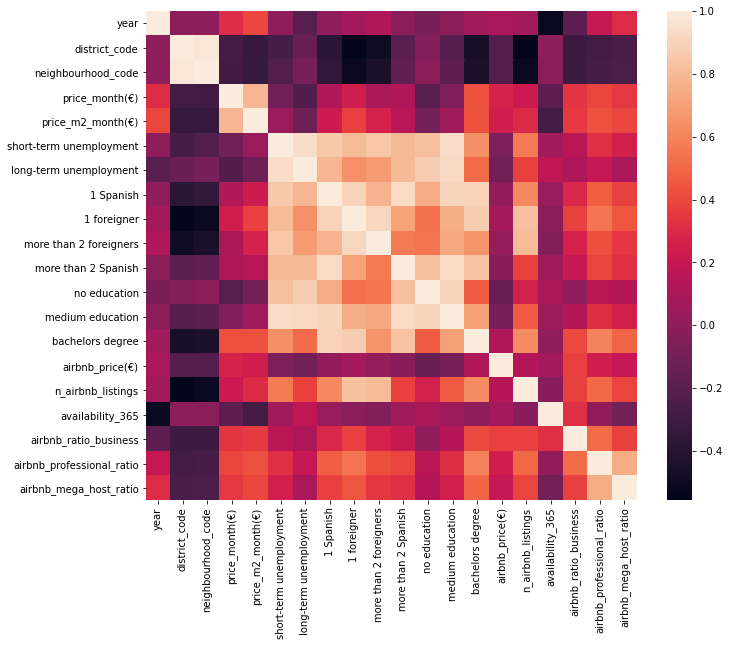

In [11]:
import seaborn as sns
plt.subplots(figsize=(11,9))
af_corr = af.corr()
sns.heatmap(af_corr)

In [12]:
correlation=af[af.columns[1:]].corr()['price_month(€)'][:]

In [13]:
features=correlation.abs().nlargest(15)
features.index

Index(['price_month(€)', 'price_m2_month(€)', 'bachelors degree',
       'airbnb_professional_ratio', 'airbnb_mega_host_ratio',
       'airbnb_ratio_business', 'neighbourhood_code', 'district_code',
       'airbnb_price(€)', '1 foreigner', 'long-term unemployment',
       'n_airbnb_listings', 'no education', 'availability_365', '1 Spanish'],
      dtype='object')

In [14]:
selected_f=af[['quarter','neighbourhood_name','price_month(€)', 'price_m2_month(€)', 'bachelors degree',
       'airbnb_professional_ratio', 'airbnb_mega_host_ratio',
       'airbnb_ratio_business', 'neighbourhood_code', 'district_code',
       'airbnb_price(€)', '1 foreigner', 'long-term unemployment',
       'n_airbnb_listings', 'no education', 'availability_365', '1 Spanish']]

In [15]:
select=selected_f.groupby(by=["neighbourhood_name","quarter"]).mean()


In [16]:

# selected_f['quarter'] = pd.to_datetime(selected_f['quarter'], errors='coerce')
select.head(2)

price_month(€)  price_m2_month(€)  \
neighbourhood_name quarter                                         
Baró de Viver      2015-01-01          303.80               5.08   
                   2015-04-01          362.94               5.58   

                               bachelors degree  airbnb_professional_ratio  \
neighbourhood_name quarter                                                   
Baró de Viver      2015-01-01             115.0                   0.104782   
                   2015-04-01             115.0                   0.000000   

                               airbnb_mega_host_ratio  airbnb_ratio_business  \
neighbourhood_name quarter                                                     
Baró de Viver      2015-01-01                0.025484               0.371072   
                   2015-04-01                0.000000               0.000000   

                               neighbourhood_code  district_code  \
neighbourhood_name quarter                                         
Baró de Viver      2015-01-01                58.0            9.0   
                   2015-04-01                58.0            9.0   

                               airbnb_price(€)  1 foreigner  \
neighbourhood_name quarter                                    
Baró de Viver      2015-01-01        84.005495         65.0   
                   2015-04-01         0.000000         65.0   

                               long-term unemployment  n_airbnb_listings  \
neighbourhood_name quarter                                                 
Baró de Viver      2015-01-01                   901.0         245.688193   
                   2015-04-01                   901.0           0.000000   

                               no education  availability_365  1 Spanish  
neighbourhood_name quarter                                                
Baró de Viver      2015-01-01         155.0        203.589158      297.0  
                   2015-04-01         155.0          0.000000      297.0

#### pick the neighbourhoods first 

In [17]:
select=select.reset_index()

In [18]:
#el Barri Gòtic
neighbour1=select[select['neighbourhood_code']==2.0]
neighbour1.shape
# selected_f[['price_m2_month(€)']].plot(title='Price Data')

#Pedrables
neighbour2=select[select['neighbourhood_code']==21.0]


In [19]:
neighbour1.shape

(24, 17)

In [20]:
neighbour2.head(1)

neighbourhood_name     quarter  price_month(€)  price_m2_month(€)  \
240          Pedralbes  2015-01-01         1250.83              11.37   

     bachelors degree  airbnb_professional_ratio  airbnb_mega_host_ratio  \
240            4970.0                   0.104782                0.025484   

     airbnb_ratio_business  neighbourhood_code  district_code  \
240               0.371072                21.0            4.0   

     airbnb_price(€)  1 foreigner  long-term unemployment  n_airbnb_listings  \
240        84.005495        401.0                  1196.0         245.688193   

     no education  availability_365  1 Spanish  
240         173.0        203.589158     1051.0

#### then you can separate train & test data

In [21]:
test_length =4
elbarri_train = neighbour1.iloc[:-test_length]
elbarri_test = neighbour1.iloc[-test_length:]

Pedralbes_train = neighbour2.iloc[:-test_length]
Pedralbes_test = neighbour2.iloc[-test_length:]

elbarri_train =elbarri_train.set_index('quarter')
elbarri_test=elbarri_test.set_index('quarter')
Pedralbes_train=Pedralbes_train.set_index('quarter')
Pedralbes_test=Pedralbes_test.set_index('quarter')

In [22]:
print(elbarri_train.shape)
print(elbarri_test.shape)
print(Pedralbes_train.shape)
print(Pedralbes_test.shape)

(20, 16)
(4, 16)
(20, 16)
(4, 16)


In [23]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

#### Decomposing the Time Series

In [24]:
# Set the frequency of the date time index as Monthly start as indicated by the data
neighbour2.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

In [25]:
# Set the frequency of the date time index as Monthly start as indicated by the data
neighbour1.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

#### el Barri Gòtic

/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-26-8c38fbebdaf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbour1['HWES1'] = SimpleExpSmoothing(neighbour1['price_month(€)']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues


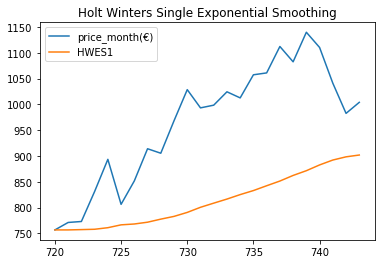

In [26]:
neighbour1['HWES1'] = SimpleExpSmoothing(neighbour1['price_month(€)']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
neighbour1[['price_month(€)','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-27-4b8ec180ac9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbour1['HWES2_ADD'] = ExponentialSmoothing(neighbour1['price_month(€)'],trend='add').fit().fittedvalues
/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An 

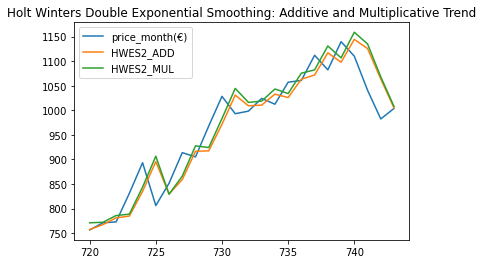

In [27]:
neighbour1['HWES2_ADD'] = ExponentialSmoothing(neighbour1['price_month(€)'],trend='add').fit().fittedvalues
neighbour1['HWES2_MUL'] = ExponentialSmoothing(neighbour1['price_month(€)'],trend='mul').fit().fittedvalues
neighbour1[['price_month(€)','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-28-3a64e6346bcf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbour1['HWES3_ADD'] = ExponentialSmoothing(neighbour1['price_m2_month(€)'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ba

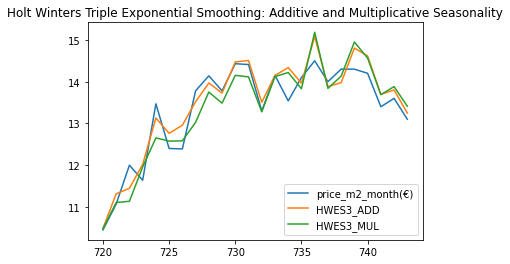

In [28]:
#### Triple HWES3

neighbour1['HWES3_ADD'] = ExponentialSmoothing(neighbour1['price_m2_month(€)'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
neighbour1['HWES3_MUL'] = ExponentialSmoothing(neighbour1['price_m2_month(€)'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
neighbour1[['price_m2_month(€)','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

In [29]:
elbarri_train.head(1)

neighbourhood_name  price_month(€)  price_m2_month(€)  \
quarter                                                            
2015-01-01     el Barri Gòtic          756.68              10.45   

            bachelors degree  airbnb_professional_ratio  \
quarter                                                   
2015-01-01            5255.0                   0.104782   

            airbnb_mega_host_ratio  airbnb_ratio_business  neighbourhood_code  \
quarter                                                                         
2015-01-01                0.025484               0.371072                 2.0   

            district_code  airbnb_price(€)  1 foreigner  \
quarter                                                   
2015-01-01            1.0        84.005495       1415.0   

            long-term unemployment  n_airbnb_listings  no education  \
quarter                                                               
2015-01-01                  5139.0         245.688193         393.0   

            availability_365  1 Spanish  
quarter                                  
2015-01-01        203.589158     2373.0

/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
Traceback (most recent call last):
  File "/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axis.py", line 1573, in convert_units
    ret = self.converter.convert(x, self.units, self)
  File "/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/matplotlib/category.py", line 61, in convert
    unit.update(values)
  File "/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/matplotlib/category.py", line 212, in update
    cbook._check_isinstance((str, bytes), value=val)
  File "/Users/mitarbeiter/opt/anaconda3/lib/pytho

TypeError: index type not supported

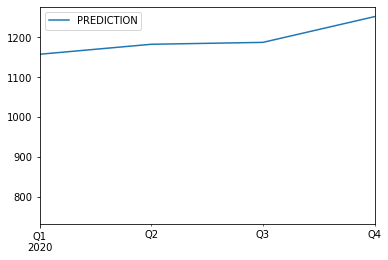

In [30]:
fitted_model = ExponentialSmoothing(elbarri_train['price_month(€)'],trend='mul',seasonal='mul',seasonal_periods=4).fit()
test_predictions = fitted_model.forecast(4)
test_predictions.plot(legend=True,label='PREDICTION')
elbarri_train['price_month(€)'].plot(legend=True,label='train')
elbarri_test['price_month(€)'].plot(legend=True,label='test',figsize=(6,6))
plt.title('Train, Test and Predicted Test using Holt Winters')

# Train_pedralbes['price_month(€)'].plot(legend=True,label='train')
# Test_pedralbes['price_month(€)'].plot(legend=True,label='test',figsize=(10,10))

In [31]:
print(fitted_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:           price_month(€)   No. Observations:                   20
Model:             ExponentialSmoothing   SSE                          39408.234
Optimized:                         True   AIC                            167.720
Trend:                   Multiplicative   BIC                            175.686
Seasonal:                Multiplicative   AICC                           192.164
Seasonal Periods:                     4   Date:                 Sun, 28 Mar 2021
Box-Cox:                          False   Time:                         19:50:15
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1464288                alpha                 True
smoothing_trend          

#### Pedrables

/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-32-622658a9924a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbour2['HWES1'] = SimpleExpSmoothing(neighbour2['price_month(€)']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues


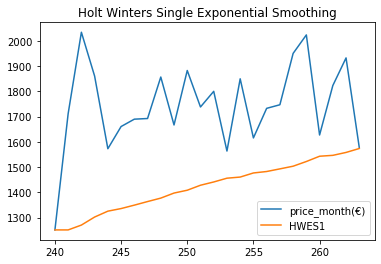

In [32]:
neighbour2['HWES1'] = SimpleExpSmoothing(neighbour2['price_month(€)']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
neighbour2[['price_month(€)','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-33-ce750c820c0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbour2['HWES2_ADD'] = ExponentialSmoothing(neighbour2['price_month(€)'],trend='add').fit().fittedvalues
/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An 

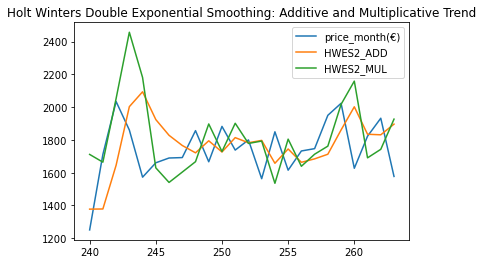

In [33]:
neighbour2['HWES2_ADD'] = ExponentialSmoothing(neighbour2['price_month(€)'],trend='add').fit().fittedvalues
neighbour2['HWES2_MUL'] = ExponentialSmoothing(neighbour2['price_month(€)'],trend='mul').fit().fittedvalues
neighbour2[['price_month(€)','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-34-e42594a4de11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbour2['HWES3_ADD'] = ExponentialSmoothing(neighbour2['price_m2_month(€)'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ba

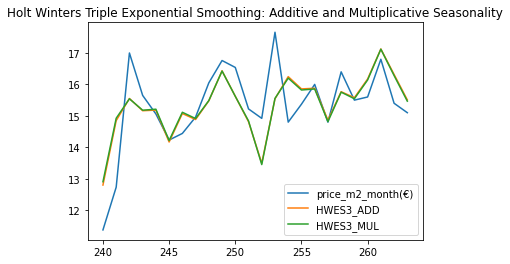

In [34]:
#### Triple HWES3

neighbour2['HWES3_ADD'] = ExponentialSmoothing(neighbour2['price_m2_month(€)'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
neighbour2['HWES3_MUL'] = ExponentialSmoothing(neighbour2['price_m2_month(€)'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
neighbour2[['price_m2_month(€)','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'
/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
Traceback (most recent call last):
  File "/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axis.py", line 1573, in convert_units
    ret = self.converter.convert(x, self.units, self)
  File "/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/matplotlib/category.py", line 61, in convert
    unit.update(values)
  File "/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/matplotlib/category.py", line 212, in update
    cbook._check_isinstance((str, bytes), value=val)
  File "/Users/mitarbeiter/opt/anaconda3/lib/pytho

TypeError: index type not supported

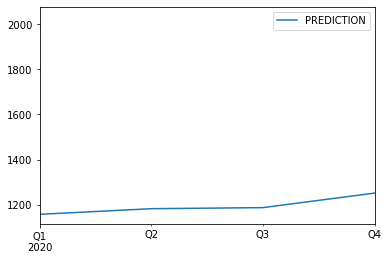

In [35]:
fitted_model2 = ExponentialSmoothing(Pedralbes_train['price_month(€)'],trend='mul',seasonal='mul',seasonal_periods=4).fit()
test_predictions = fitted_model.forecast(4)
test_predictions.plot(legend=True,label='PREDICTION')
Pedralbes_train['price_month(€)'].plot(legend=True,label='train')
Pedralbes_test['price_month(€)'].plot(legend=True,label='test',figsize=(6,6))
plt.title('Train, Test and Predicted Test using Holt Winters')

# Train_pedralbes['price_month(€)'].plot(legend=True,label='train')
# Test_pedralbes['price_month(€)'].plot(legend=True,label='test',figsize=(10,10))

In [52]:
print(fitted_model2.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:           price_month(€)   No. Observations:                   20
Model:             ExponentialSmoothing   SSE                         654945.252
Optimized:                         True   AIC                            223.931
Trend:                   Multiplicative   BIC                            231.897
Seasonal:                Multiplicative   AICC                           248.376
Seasonal Periods:                     4   Date:                 Sun, 28 Mar 2021
Box-Cox:                          False   Time:                         19:50:48
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1110717                alpha                 True
smoothing_trend          

In [53]:
price1=af[['quarter','neighbourhood_name','price_month(€)']]
price1_el=price1[price1['neighbourhood_name']=='el Barri Gòtic']
price2_pe=price1[price1['neighbourhood_name']=='Pedralbes']
             
price1_el
df_1 = price1_el.rename(columns={'quarter': 'ds','price_month(€)':'y'})
df_2 = price2_pe.rename(columns={'quarter': 'ds','price_month(€)':'y'})
# df_1=df_1.drop('neighbourhood_name',inplace=True)
# df_2=df_2.drop('neighbourhood_name',inplace=True, axis=1)
del df_1["neighbourhood_name"]
del df_2["neighbourhood_name"]


In [54]:
df_1

ds        y
24  2015-01-01   756.68
25  2015-04-01   771.13
26  2015-07-01   773.00
27  2015-10-01   831.13
28  2016-01-01   893.42
29  2016-04-01   806.24
30  2016-07-01   851.63
31  2016-10-01   913.96
32  2017-01-01   905.26
33  2017-04-01   968.16
34  2017-07-01  1028.49
35  2017-10-01   993.16
36  2018-01-01   998.40
37  2018-04-01  1024.29
38  2018-07-01  1012.49
39  2018-10-01  1057.26
40  2019-01-01  1060.90
41  2019-04-01  1112.10
42  2019-07-01  1082.40
43  2019-10-01  1139.70
44  2020-01-01  1110.20
45  2020-04-01  1041.00
46  2020-07-01   982.50
47  2020-10-01  1003.90

#### Add more features

#### Prophet

In [55]:
#el Barri Gòtic
df_1.shape

#'Pedrables'
df_2.shape


(24, 2)

#### el Barri Gòtic

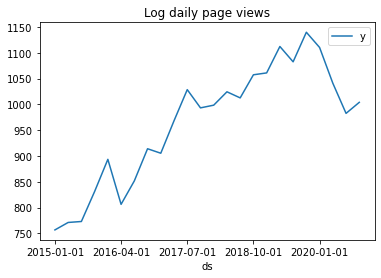

In [56]:
df_1.plot(x='ds', y='y', title='Log daily page views');

In [57]:
df_1.head(1)

ds       y
24  2015-01-01  756.68

In [58]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# y = df_1['y']
# X = df_1.drop(['y'], axis=1)

# X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)


In [59]:
test_length = 4
df_train = df_1.iloc[:-test_length]
df_test = df_1.iloc[-test_length:]


In [60]:
df_train=df_train.reset_index()
df_test=df_test.reset_index()

In [61]:
del df_test['index']

In [62]:
df_test

ds       y
0  2020-01-01  1110.2
1  2020-04-01  1041.0
2  2020-07-01   982.5
3  2020-10-01  1003.9

In [63]:
prophet_model = Prophet()
prophet_model.fit(df_train)
future_df = prophet_model.make_future_dataframe(periods=test_length)
preds_df_1 = prophet_model.predict(future_df)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


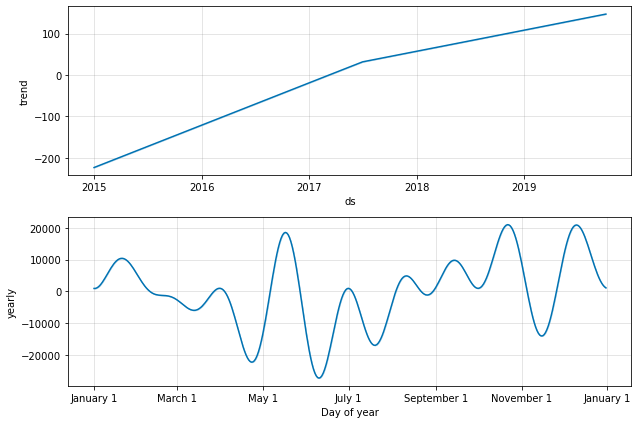

In [64]:
prophet_model.plot_components(preds_df_1);

In [65]:
from fbprophet import Prophet
# The Prophet class (model)
fbp = Prophet(daily_seasonality = True) 
 # Fit the model 
fbp.fit(df_train)
fut = fbp.make_future_dataframe(periods=180) 
forecast = fbp.predict(fut)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [66]:
from fbprophet.plot import plot_plotly, plot_components_plotly
# A better plot than the simple matplotlib
plot_plotly(fbp, forecast)

In [67]:
#  pip install NeuralProphet

In [68]:
# del df_train['index']

In [73]:
from neuralprophet import NeuralProphet
model = NeuralProphet()

In [74]:
# del df_train['index']

In [75]:
import neuralprophet

In [111]:
del df_train['index']

In [112]:
nprophet_model = NeuralProphet()
metrics = nprophet_model.fit(df_train, freq="Q")
future_df = nprophet_model.make_future_dataframe(df_train, 
                                                 periods = test_length, 
                                                 n_historic_predictions=len(df_train))
preds_df_2 = nprophet_model.predict(future_df)




INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:nprophet.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:nprophet.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO:nprophet.config:Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 800
INFO:nprophet.config:Auto-set epochs to 800


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
INFO:nprophet:learning rate range test found optimal lr: 4.33E-01
Epoch[800/800]: 100%|██████████| 800/800 [00:26<00:00, 30.46it/s, SmoothL1Loss=0.000722, MAE=13.2, RegLoss=0]


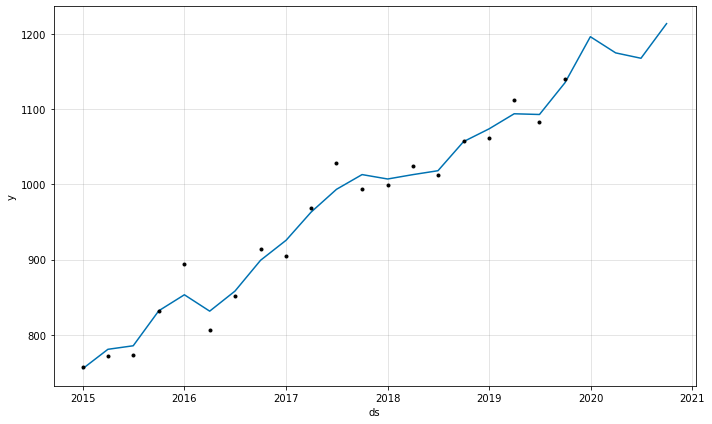

In [113]:
nprophet_model.plot(preds_df_2);

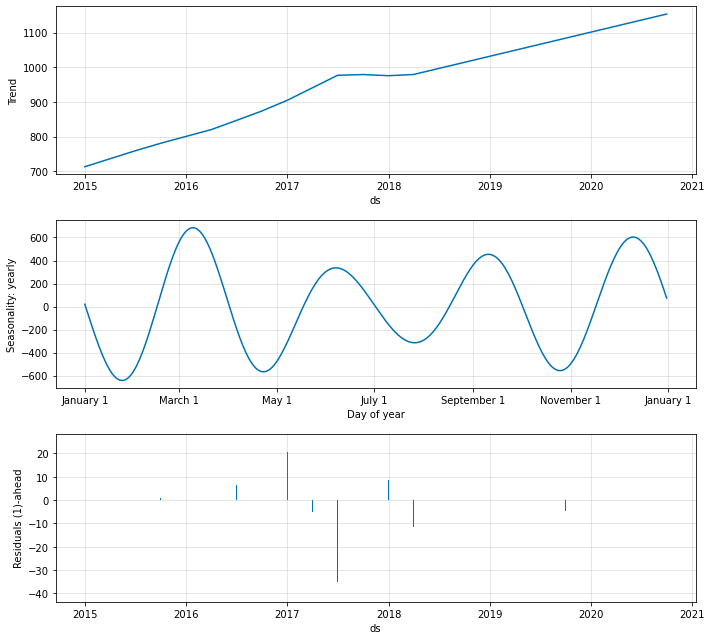

In [114]:
nprophet_model.plot_components(preds_df_2, residuals=True);

#### Neuralprophet performance compariosn

In [115]:
# prepping the DataFrame
df_test['prophet'] = preds_df_1.iloc[-test_length:].loc[:, 'yhat']
df_test['neural_prophet'] = preds_df_2.iloc[-test_length:].loc[:, 'yhat1']

# df_test.set_index('ds', inplace=True)

# print('MSE comparison ----')
# print(f"Prophet:\t{mean_squared_error(df_test['y'], preds_df_1.iloc[-test_length:]['yhat']):.4f}")
# print(f"NeuralProphet:\t{mean_squared_error(df_test['y'], preds_df_2.iloc[-test_length:]['yhat1']):.4f}")

# df_test.plot(title='Forecast evaluation');

In [116]:
preds_df_1.iloc[-test_length:].loc[:, 'yhat']

20    1113.564562
21    1276.464124
22    1624.858488
23    2159.408798
Name: yhat, dtype: float64

In [117]:
# import pandas as pd
# import matplotlib.pyplot as plt

# from fbprophet import Prophet
# from fbprophet.plot import add_changepoints_to_plot

# # Load test data: log-transformed daily page views for the Wikipedia page for Peyton Manning.
# df=df_train
# df['cap'] = 8 # Saturating maximum
# df['floor'] = 5 # Saturating minimum


# # Future data generation
# future = m.make_future_dataframe(periods=365*1)
# future['cap'] = 8 # Saturating maximum
# future['floor'] = 5 # Saturating minimum

# # Future forecast
# forecast = m.predict(future) 

# # Visualize
# fig1 = m.plot(forecast) # Plot the fit to past data and future forecast.
# a = add_changepoints_to_plot(fig1.gca(), m, forecast)
# fig2 = m.plot_components(forecast) # Plot breakdown of components.
# plt.show()

#### Pedralbes

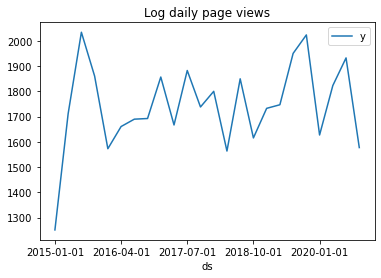

In [118]:
df_2.plot(x='ds', y='y', title='Log daily page views');

In [119]:
test_length = 4
df_train2 = df_2.iloc[:-test_length]
df_test2 = df_2.iloc[-test_length:]


In [120]:
df_train2=df_train2.reset_index()
df_test2=df_test2.reset_index()

prophet_model = Prophet()
prophet_model.fit(df_train2)
future_df2 = prophet_model.make_future_dataframe(periods=test_length)
preds_df_2 = prophet_model.predict(future_df2)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


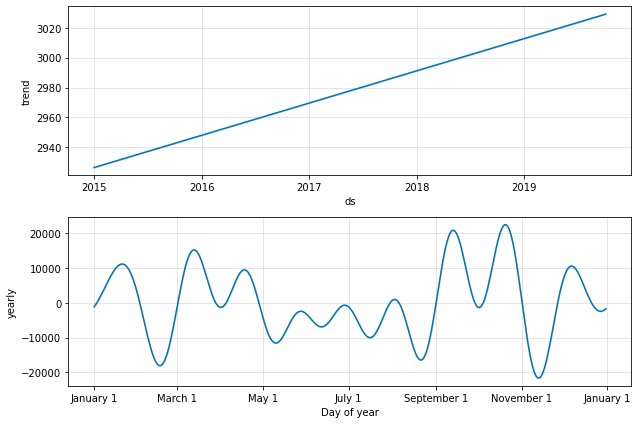

In [121]:
prophet_model.plot_components(preds_df_2);

In [122]:
preds_df_2.head(2)

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2015-01-01  2926.540406  1416.873157  1688.615527  2926.540406  2926.540406   
1 2015-04-01  2931.853387  1520.217023  1777.827336  2931.853387  2931.853387   

   additive_terms  additive_terms_lower  additive_terms_upper       yearly  \
0    -1376.329478          -1376.329478          -1376.329478 -1376.329478   
1    -1284.583516          -1284.583516          -1284.583516 -1284.583516   

   yearly_lower  yearly_upper  multiplicative_terms  \
0  -1376.329478  -1376.329478                   0.0   
1  -1284.583516  -1284.583516                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  1550.210928  
1                         0.0                         0.0  1647.269871

In [123]:
from fbprophet import Prophet
# The Prophet class (model)
fbp = Prophet(daily_seasonality = True) 
 # Fit the model 
fbp.fit(df_train2)
fut = fbp.make_future_dataframe(periods=180) 
forecast = fbp.predict(fut)

##forecast should be quarter 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [124]:
forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2015-01-01   994.411912  1405.642051  1677.475740   994.411912   
1   2015-04-01  1000.094532  1532.146668  1779.039245  1000.094532   
2   2015-07-01  1005.840293  1803.289885  2054.247149  1005.840293   
3   2015-10-01  1011.649193  1718.747369  1968.407922  1011.649193   
4   2016-01-01  1017.458093  1340.018737  1592.168470  1017.458093   
..         ...          ...          ...          ...          ...   
195 2020-03-25  1114.995281  9473.175391  9730.882487  1114.995183   
196 2020-03-26  1115.058412  7416.512100  7676.995570  1115.058313   
197 2020-03-27  1115.121543  5626.487840  5890.383846  1115.121444   
198 2020-03-28  1115.184674  4140.134878  4399.581610  1115.184574   
199 2020-03-29  1115.247805  2966.829923  3230.436149  1115.247704   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     994.411912      549.215258            549.215258            549.215258   
1    1000.094532      646.913203            646.913203            646.913203   
2    1005.840293      928.264660            928.264660            928.264660   
3    1011.649193      825.515802            825.515802            825.515802   
4    1017.458093      447.854601            447.854601            447.854601   
..           ...             ...                   ...                   ...   
195  1114.995398     8483.545422           8483.545422           8483.545422   
196  1115.058530     6434.965040           6434.965040           6434.965040   
197  1115.121662     4645.764582           4645.764582           4645.764582   
198  1115.184794     3152.509810           3152.509810           3152.509810   
199  1115.247925     1984.718693           1984.718693           1984.718693   

            daily   daily_lower   daily_upper        yearly  yearly_lower  \
0    15912.516757  15912.516757  15912.516757 -15363.301499 -15363.301499   
1    15912.516757  15912.516757  15912.516757 -15265.603554 -15265.603554   
2    15912.516757  15912.516757  15912.516757 -14984.252097 -14984.252097   
3    15912.516757  15912.516757  15912.516757 -15087.000955 -15087.000955   
4    15912.516757  15912.516757  15912.516757 -15464.662156 -15464.662156   
..            ...           ...           ...           ...           ...   
195  15912.516757  15912.516757  15912.516757  -7428.971335  -7428.971335   
196  15912.516757  15912.516757  15912.516757  -9477.551717  -9477.551717   
197  15912.516757  15912.516757  15912.516757 -11266.752175 -11266.752175   
198  15912.516757  15912.516757  15912.516757 -12760.006947 -12760.006947   
199  15912.516757  15912.516757  15912.516757 -13927.798064 -13927.798064   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0   -15363.301499                   0.0                         0.0   
1   -15265.603554                   0.0                         0.0   
2   -14984.252097                   0.0                         0.0   
3   -15087.000955                   0.0                         0.0   
4   -15464.662156                   0.0                         0.0   
..            ...                   ...                         ...   
195  -7428.971335                   0.0                         0.0   
196  -9477.551717                   0.0                         0.0   
197 -11266.752175                   0.0                         0.0   
198 -12760.006947                   0.0                         0.0   
199 -13927.798064                   0.0                         0.0   

     multiplicative_terms_upper         yhat  
0                           0.0  1543.627171  
1                           0.0  1647.007736  
2                           0.0  1934.104953  
3                           0.0  1837.164995  
4                           0.0  1465.312695  
..                          ...          ...  
195                         0.0  9598.540703  
196                         0.0  7550.023453  
197      

In [125]:
from fbprophet.plot import plot_plotly, plot_components_plotly
# A better plot than the simple matplotlib
plot_plotly(fbp, forecast)

In [128]:
from fbprophet import Prophet
# The Prophet class (model)
fbp = Prophet(daily_seasonality = True) 
 # Fit the model 
fbp.fit(df_2)
fut = fbp.make_future_dataframe(periods=180) 
forecast = fbp.predict(fut)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


In [131]:
# df_neural=df_train2.copy()
# del df_neural['cap']
# del df_neural['floor']
# df_neural=df_neural.reset_index()
# del df_neural['index']
# del df_neural['level_0']
# df_neural=df_neural.set_index('ds')
# df_neural=df_neural.reset_index()


In [138]:
del df_neural['index']

In [518]:
df_neural

ds        y
0  2015-01-01  1250.83
1  2015-04-01  1711.45
2  2015-07-01  2034.00
3  2015-10-01  1860.30
4  2016-01-01  1572.56
5  2016-04-01  1660.43
6  2016-07-01  1689.60
7  2016-10-01  1692.20
8  2017-01-01  1856.57
9  2017-04-01  1666.63
10 2017-07-01  1882.42
11 2017-10-01  1737.92
12 2018-01-01  1799.91
13 2018-04-01  1563.31
14 2018-07-01  1849.52
15 2018-10-01  1615.31
16 2019-01-01  1732.50
17 2019-04-01  1746.70
18 2019-07-01  1950.10
19 2019-10-01  2023.40

In [517]:
nprophet_model = NeuralProphet()
metrics = nprophet_model.fit(df_neural, freq="Q")
future_df2 = nprophet_model.make_future_dataframe(df_neural, 
                                                 periods = test_length, 
                                                 n_historic_predictions=len(df_neural))
preds_df_4 = nprophet_model.predict(future_df2)

INFO: nprophet.utils - set_auto_seasonalities: Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:nprophet.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:nprophet.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO:nprophet.config:Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 800
INFO:nprophet.config:Auto-set epochs to 800


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-01
INFO:nprophet:learning rate range test found optimal lr: 1.87E-01
Epoch[800/800]: 100%|██████████| 800/800 [00:29<00:00, 27.38it/s, SmoothL1Loss=0.00389, MAE=70.6, RegLoss=0] 


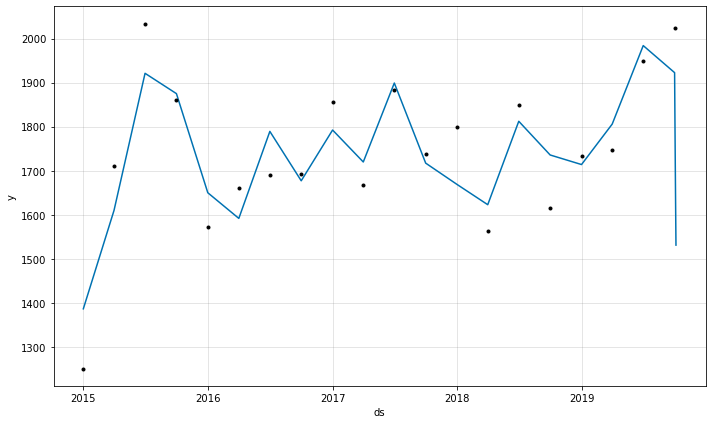

In [140]:
nprophet_model.plot(preds_df_4);

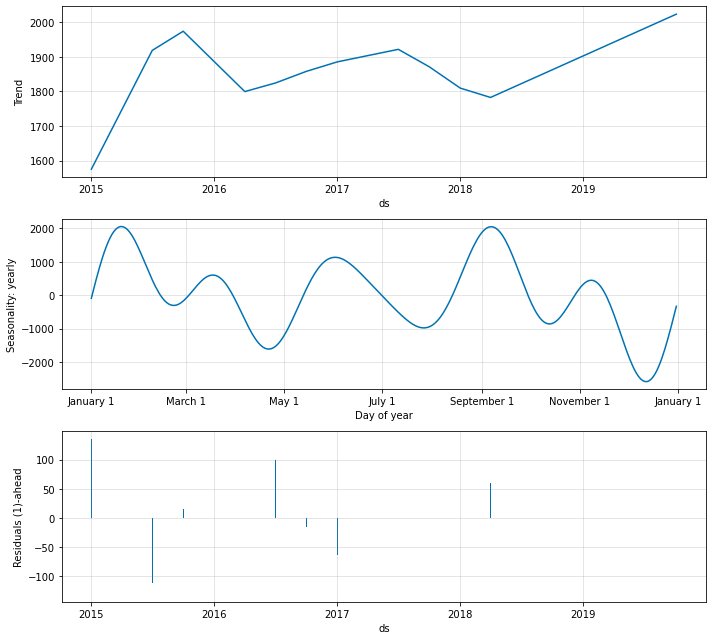

In [142]:
nprophet_model.plot_components(preds_df_4, residuals=True);

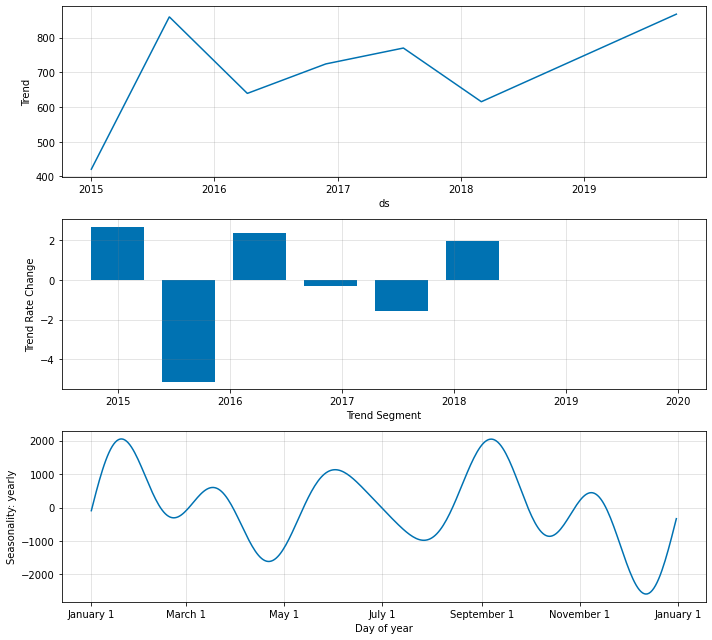

In [143]:
nprophet_model.plot_parameters();

In [144]:
df_test2

index       y  prophet  neural_prophet
ds                                                
2020-01-01    644  1626.9      NaN             NaN
2020-04-01    645  1822.7      NaN             NaN
2020-07-01    646  1932.3      NaN             NaN
2020-10-01    647  1577.1      NaN             NaN

In [145]:
preds_df_2.iloc[-test_length:].loc[:, 'yhat']

20    1673.756299
21    1743.103215
22    2131.430811
23    2829.782956
Name: yhat, dtype: float64

In [146]:
df_test2['prophet'] = preds_df_2.iloc[-test_length:].loc[:, 'yhat']
df_test2['neural_prophet'] = preds_df_4.iloc[-test_length:].loc[:, 'yhat1']
df_test2.set_index('ds', inplace=True)

print('MSE comparison ----')
print(f"Prophet:\t{mean_squared_error(df_test['y'], preds_df_1.iloc[-test_length:]['yhat']):.4f}")
print(f"NeuralProphet:\t{mean_squared_error(df_test['y'], preds_df_2.iloc[-test_length:]['yhat1']):.4f}")

df_test.plot(title='Forecast evaluation');

KeyError: "None of ['ds'] are in the columns"

In [147]:
# from fbprophet.plot import plot_plotly, plot_components_plotly
# # A better plot than the simple matplotlib
# plot_plotly(fbp, forecast)

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# from fbprophet import Prophet
# from fbprophet.plot import add_changepoints_to_plot

# # Load test data: log-transformed daily page views for the Wikipedia page for Peyton Manning.
# df=df_2
# df['cap'] = 8 # Saturating maximum
# df['floor'] = 5 # Saturating minimum


# # Future data generation
# future = m.make_future_dataframe(periods=365*1)
# future['cap'] = 8 # Saturating maximum
# future['floor'] = 5 # Saturating minimum

# # Future forecast
# forecast = m.predict(future) 

# # Visualize
# fig1 = m.plot(forecast) # Plot the fit to past data and future forecast.
# a = add_changepoints_to_plot(fig1.gca(), m, forecast)
# fig2 = m.plot_components(forecast) # Plot breakdown of components.
# plt.show()

In [ ]:
semi_df=af[['quarter','neighbourhood_name','price_month(€)']]
semi_df = semi_df.rename(columns={'quarter': 'ds','price_month(€)':'y'})
semi_df

#### cross-validation option; el Barri Gòtic

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INFO:fbprophet:Making 6 forecasts with cutoffs between 2017-04-15 00:00:00 and 2019-10-02 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


horizon          mse       rmse        mae      mape     mdape  coverage
0 81 days  3913.013920  62.554088  60.892499  0.060308  0.060308       0.0
1 82 days  4238.556511  65.104197  64.158594  0.063891  0.063891       0.0
2 86 days  1409.953445  37.549347  26.580169  0.026251  0.026251       0.5
3 87 days   276.662773  16.633183  11.790188  0.010893  0.010893       0.5
4 91 days  1983.785868  44.539711  40.977191  0.037182  0.037182       0.0

horizon           mse        rmse        mae      mape     mdape  coverage
18 354 days   5593.903198   74.792401  72.041150  0.069542  0.069542       0.0
19 356 days   2539.505717   50.393509  50.368951  0.046503  0.046503       0.0
20 359 days   2933.877950   54.165284  53.922161  0.047844  0.047844       0.0
21 362 days   1796.399665   42.383955  34.674058  0.030852  0.030852       0.5
22 365 days  11079.676708  105.260043  79.401566  0.078910  0.078910       0.5

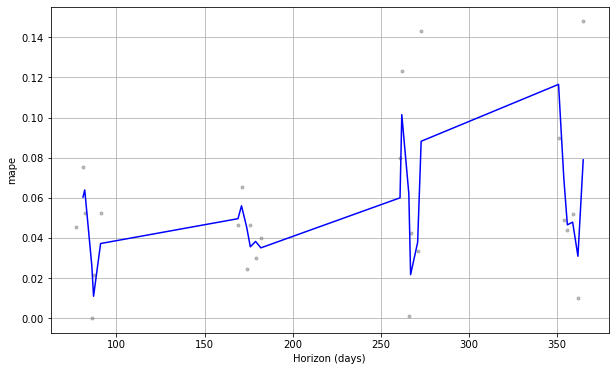

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

# Load test data: log-transformed daily page views for the Wikipedia page for Peyton Manning.
m = Prophet()
m.fit(df_1)

# Execute cross validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()

#### cross-validation option; Pedralbes

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INFO:fbprophet:Making 6 forecasts with cutoffs between 2017-04-15 00:00:00 and 2019-10-02 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


horizon           mse        rmse         mae      mape     mdape  coverage
0 81 days   8551.209387   92.472749   79.808652  0.042800  0.042800       0.5
1 82 days  18340.682870  135.427777  110.870538  0.060192  0.060192       0.5
2 86 days  37072.909098  192.543266  192.504520  0.107669  0.107669       0.0
3 87 days  25852.924636  160.788447  155.511178  0.086069  0.086069       0.5
4 91 days   9854.822790   99.271460   97.836303  0.054297  0.054297       1.0

horizon            mse        rmse         mae      mape     mdape  \
18 354 days  175319.869082  418.712155  416.814882  0.262742  0.262742   
19 356 days   71581.802673  267.547758  204.582538  0.125903  0.125903   
20 359 days   29929.503089  173.001454  137.351254  0.069141  0.069141   
21 362 days   36472.108289  190.976722  180.682111  0.092530  0.092530   
22 365 days   18452.484341  135.839922  134.887168  0.080452  0.080452   

    coverage  
18       0.0  
19       0.5  
20       0.5  
21       0.5  
22       0.5

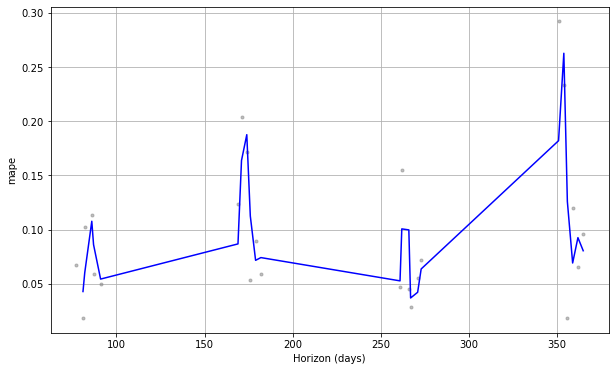

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

# Load test data: log-transformed daily page views for the Wikipedia page for Peyton Manning.
m = Prophet()
m.fit(df_2)

# Execute cross validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()

In [151]:
df_1

ds        y
24  2015-01-01   756.68
25  2015-04-01   771.13
26  2015-07-01   773.00
27  2015-10-01   831.13
28  2016-01-01   893.42
29  2016-04-01   806.24
30  2016-07-01   851.63
31  2016-10-01   913.96
32  2017-01-01   905.26
33  2017-04-01   968.16
34  2017-07-01  1028.49
35  2017-10-01   993.16
36  2018-01-01   998.40
37  2018-04-01  1024.29
38  2018-07-01  1012.49
39  2018-10-01  1057.26
40  2019-01-01  1060.90
41  2019-04-01  1112.10
42  2019-07-01  1082.40
43  2019-10-01  1139.70
44  2020-01-01  1110.20
45  2020-04-01  1041.00
46  2020-07-01   982.50
47  2020-10-01  1003.90

#### Arima 

In [152]:
import numpy as np
from sklearn.model_selection import train_test_split


data =df_1.values

In [154]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)


(24, 1) (24,)


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16, 1) (8, 1) (16,) (8,)


In [156]:
from statsmodels.tsa.stattools import adfuller

In [158]:
df_1

ds        y
24  2015-01-01   756.68
25  2015-04-01   771.13
26  2015-07-01   773.00
27  2015-10-01   831.13
28  2016-01-01   893.42
29  2016-04-01   806.24
30  2016-07-01   851.63
31  2016-10-01   913.96
32  2017-01-01   905.26
33  2017-04-01   968.16
34  2017-07-01  1028.49
35  2017-10-01   993.16
36  2018-01-01   998.40
37  2018-04-01  1024.29
38  2018-07-01  1012.49
39  2018-10-01  1057.26
40  2019-01-01  1060.90
41  2019-04-01  1112.10
42  2019-07-01  1082.40
43  2019-10-01  1139.70
44  2020-01-01  1110.20
45  2020-04-01  1041.00
46  2020-07-01   982.50
47  2020-10-01  1003.90

In [159]:
#let's do adfuller test for Pedralbe's price 
test_result=adfuller(df_1['y'])

In [160]:
def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
        else:
            print("weak evidence against null hypothesis,indicating it is non-stationary ")




In [161]:
adfuller_test(df_1['y'])

ADF Test Statistic : -1.8446986406118269
weak evidence against null hypothesis,indicating it is non-stationary 
p-value : 0.35850654555354633
weak evidence against null hypothesis,indicating it is non-stationary 
#Lags Used : 0
weak evidence against null hypothesis,indicating it is non-stationary 
Number of Observations : 23
weak evidence against null hypothesis,indicating it is non-stationary 


In [164]:
adfuller_test(df_2['y'])

ADF Test Statistic : -5.904230409328185
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
p-value : 2.7325260031169494e-07
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
#Lags Used : 0
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
Number of Observations : 23
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [165]:
df_1['price first difference']= df_1['y'] - df_1['y'].shift(1)
df_1['price qaurterly difference']=df_1['y']-df_1['y'].shift(4)
df_1.head()

ds       y  price first difference  price qaurterly difference
24  2015-01-01  756.68                     NaN                         NaN
25  2015-04-01  771.13                   14.45                         NaN
26  2015-07-01  773.00                    1.87                         NaN
27  2015-10-01  831.13                   58.13                         NaN
28  2016-01-01  893.42                   62.29                      136.74

In [163]:
df_2['price first difference']= df_2['y'] - df_2['y'].shift(1)
df_2['price qaurterly difference']=df_2['y']-df_2['y'].shift(4)
df_2.head()

ds        y  price first difference  price qaurterly difference
624  2015-01-01  1250.83                     NaN                         NaN
625  2015-04-01  1711.45                  460.62                         NaN
626  2015-07-01  2034.00                  322.55                         NaN
627  2015-10-01  1860.30                 -173.70                         NaN
628  2016-01-01  1572.56                 -287.74                      321.73

In [166]:
#after shift, now El bari coti has the stationry data as well 
adfuller_test(df_1['price first difference'].dropna())

ADF Test Statistic : -5.002740444747698
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
p-value : 2.191766170266053e-05
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
#Lags Used : 0
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
Number of Observations : 22
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [168]:
# so let's finalise it 
df_1_copy=df_1.copy()
df_1_copy=df_1['price first difference'].dropna()

Text(0, 0.5, 'price')

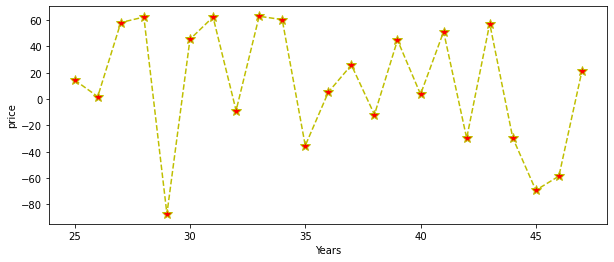

In [169]:
df_1_copy.plot(x='quarter',y='price first difference',figsize=(10,4),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)

plt.xlabel('Years')
plt.ylabel('price')

In [173]:
df_1

ds        y  price first difference  price qaurterly difference
24  2015-01-01   756.68                     NaN                         NaN
25  2015-04-01   771.13                   14.45                         NaN
26  2015-07-01   773.00                    1.87                         NaN
27  2015-10-01   831.13                   58.13                         NaN
28  2016-01-01   893.42                   62.29                      136.74
29  2016-04-01   806.24                  -87.18                       35.11
30  2016-07-01   851.63                   45.39                       78.63
31  2016-10-01   913.96                   62.33                       82.83
32  2017-01-01   905.26                   -8.70                       11.84
33  2017-04-01   968.16                   62.90                      161.92
34  2017-07-01  1028.49                   60.33                      176.86
35  2017-10-01   993.16                  -35.33                       79.20
36  2018-01-01   998.40                    5.24                       93.14
37  2018-04-01  1024.29                   25.89                       56.13
38  2018-07-01  1012.49                  -11.80                      -16.00
39  2018-10-01  1057.26                   44.77                       64.10
40  2019-01-01  1060.90                    3.64                       62.50
41  2019-04-01  1112.10                   51.20                       87.81
42  2019-07-01  1082.40                  -29.70                       69.91
43  2019-10-01  1139.70                   57.30                       82.44
44  2020-01-01  1110.20                  -29.50                       49.30
45  2020-04-01  1041.00                  -69.20                      -71.10
46  2020-07-01   982.50                  -58.50                      -99.90
47  2020-10-01  1003.90                   21.40                     -135.80

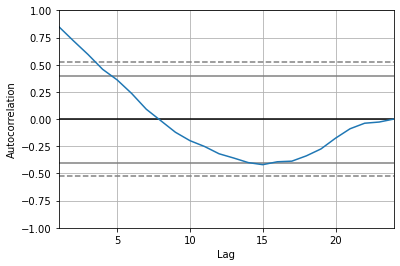

In [176]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_1['y'])
plt.show()

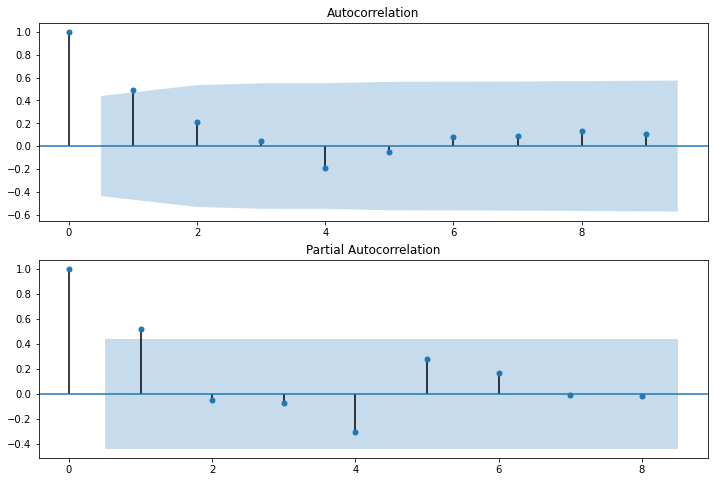

In [177]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_1['price qaurterly difference'].dropna(),lags=9,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_1['price qaurterly difference'].dropna(),lags=8,ax=ax2)

In [178]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df_1['y'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/mitarbeiter/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Use

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   23
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -119.680
Method:                       css-mle   S.D. of innovations             42.900
Date:                Sun, 28 Mar 2021   AIC                            247.361
Time:                        21:01:33   BIC                            251.903
Sample:                             1   HQIC                           248.503
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1009      4.600      2.630      0.009       3.084      21.117
ar.L1.D.y      0.8211      0.183      4.495      0.000       0.463       1.179
ma.L1.D.y     -1.0000      0.126     -7.909      0.000      -1.248      -0.752
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2179           +0.0000j            1.2179            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [179]:

!pip install pmdarima 

from pmdarima import auto_arima 
  
import warnings 
warnings.filterwarnings("ignore") 
  

stepwise_fit = auto_arima(df_1['y'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

zsh:1: command not found: pip
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=149.284, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=163.856, Time=0.05 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=151.283, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=143.055, Time=0.05 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=144.998, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=145.014, Time=0.28 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=145.471, Time=0.07 sec
 ARIMA(2,0,1)(0,1,0)[12] interc

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   24
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 -68.833
Date:                            Sun, 28 Mar 2021   AIC                            141.667
Time:                                    21:03:26   BIC                            142.637
Sample:                                         0   HQIC                           141.308
                                             - 24                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9128      0.122      7.480      0.000       0.674       1.152
sigma2      5243.1119   2307.494      2.272      0.023     720.506    9765.718
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.69   Prob(JB):                         0.95
Heteroskedasticity (H):              11.11   Skew:                             0.21
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [185]:
# Split data into train / test sets 
train = df_1.iloc[:len(df_1)-5] 
test = df_1.iloc[len(df_1)-5:] # there are 22 rows (17 rows for train/5 rows for testing)
  


In [196]:
test

ds       y  price first difference  price qaurterly difference
43  2019-10-01  1139.7                    57.3                       82.44
44  2020-01-01  1110.2                   -29.5                       49.30
45  2020-04-01  1041.0                   -69.2                      -71.10
46  2020-07-01   982.5                   -58.5                      -99.90
47  2020-10-01  1003.9                    21.4                     -135.80

In [188]:
# Fit a SARIMAX (0,0,0)(0,1,0)[12]   on the training set 
 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['y'],  
                order = (1, 0, 0),  
                seasonal_order =(0, 1, 0, 12)) 
  
result = model.fit() 
result.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   19
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 -39.978
Date:                            Sun, 28 Mar 2021   AIC                             83.957
Time:                                    21:06:46   BIC                             83.849
Sample:                                         0   HQIC                            82.620
                                             - 19                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9389      0.195      4.814      0.000       0.557       1.321
sigma2      4366.8942   2890.134      1.511      0.131   -1297.664       1e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.96   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.05   Prob(JB):                         0.43
Heteroskedasticity (H):              27.05   Skew:                             1.16
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

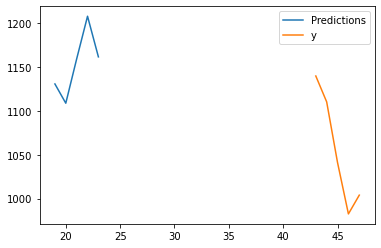

In [190]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['y'].plot(legend = True) 

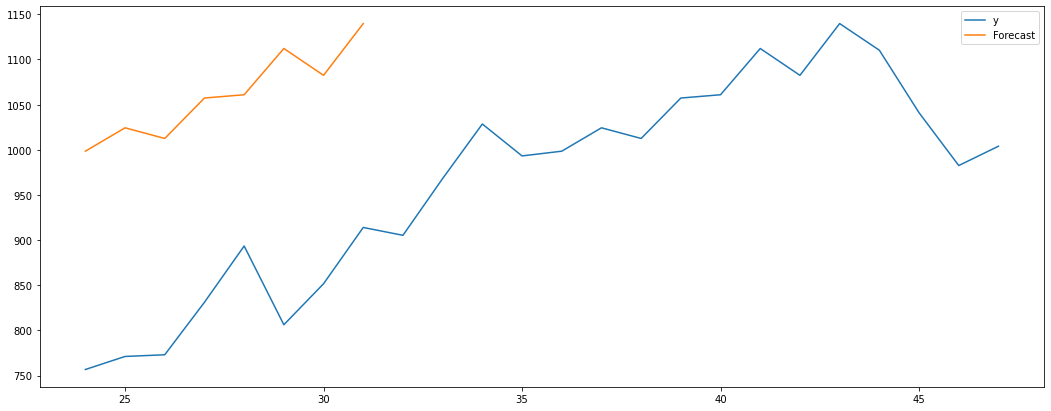

In [194]:
# Train the model on the full dataset 
model = model = SARIMAX(df_1['y'],  
                      order = (0, 0, 0),  
                seasonal_order =(0, 1, 0, 12)) 
result = model.fit() 
  
# Forecast for the next 6 quarters
forecast = result.predict(start = len(df_1),  
                          end = (len(df_1)-1) + 8,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df_1['y'].plot(figsize = (18, 7), legend = True) 
forecast.plot(legend = True) 

#### Pedralbes Arima

In [198]:
# Split data into train / test sets 
train_2 = df_2.iloc[:len(df_1)-5] 
test_2 = df_2.iloc[len(df_1)-5:] # there are 22 rows (17 rows for train/5 rows for testing)
  


In [200]:
# Fit a SARIMAX (0,0,0)(0,1,0)[12]   on the training set 
 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model_2 = SARIMAX(train_2['y'],  
                order = (1, 0, 0),  
                seasonal_order =(0, 1, 0, 12)) 
  
result_2 = model_2.fit() 
result_2.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   19
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 -48.969
Date:                            Sun, 28 Mar 2021   AIC                            101.937
Time:                                    21:32:14   BIC                            101.829
Sample:                                         0   HQIC                           100.600
                                             - 19                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5055      0.224      2.257      0.024       0.066       0.945
sigma2      7.701e+04   6.02e+04      1.279      0.201    -4.1e+04    1.95e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.41   Prob(JB):                         0.80
Heteroskedasticity (H):               0.16   Skew:                            -0.34
Prob(H) (two-sided):                  0.27   Kurtosis:                         1.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

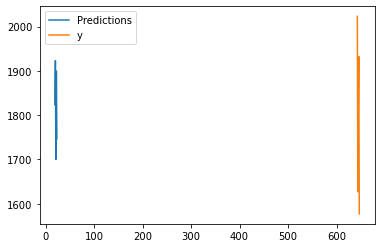

In [201]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result_2.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test_2['y'].plot(legend = True) 

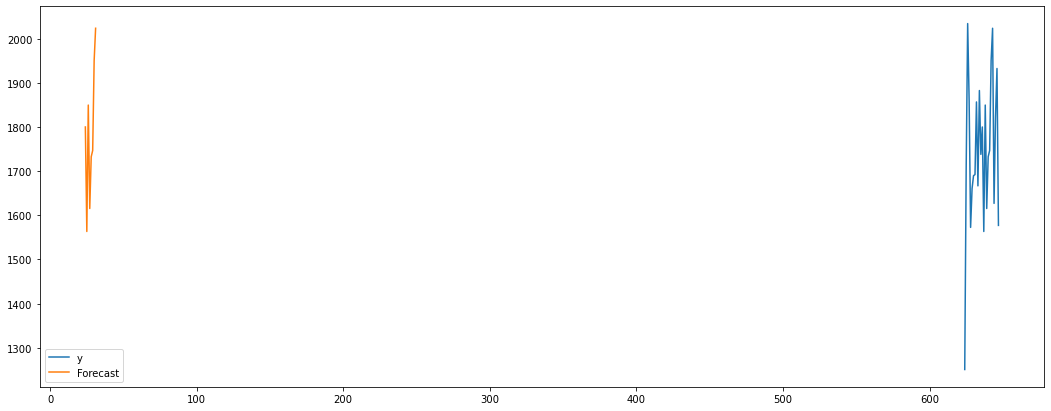

In [202]:
# Train the model on the full dataset 
model_2 = model = SARIMAX(df_2['y'],  
                      order = (0, 0, 0),  
                seasonal_order =(0, 1, 0, 12)) 
result_2 = model_2.fit() 
  
# Forecast for the next 6 quarters
forecast_2 = result_2.predict(start = len(df_2),  
                          end = (len(df_2)-1) + import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()8,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df_2['y'].plot(figsize = (18, 7), legend = True) 
forecast.plot(legend = True) 

In [276]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [277]:
df_arima=df_1.copy()
del df_arima['price first difference']
df_arima
del df_arima['price qaurterly difference']

In [278]:
# df_arima.set_index('ds')

In [279]:
# df_arima=df_arima.set_index('ds')


TypeError: unhashable type: 'numpy.ndarray'

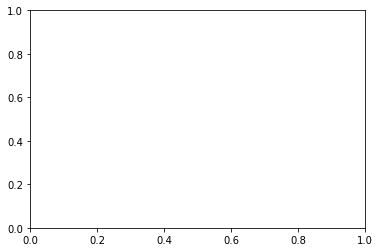

In [280]:
rolling_mean = df_arima.rolling(window = 12).mean()
rolling_std = df_arima.rolling(window = 12).std()

plt.plot(df_arima, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean increases.
df_log = np.log(df_arima)
plt.xticks(rotation=90)
plt.plot(df_arima)

In [281]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(df_arima['y'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

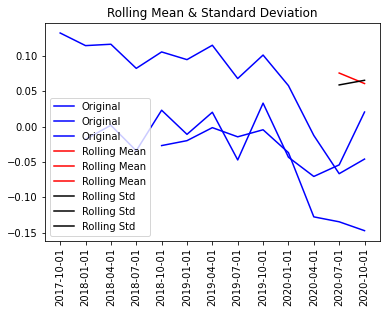

ADF Statistic: -1.8446986406118269
p-value: 0.35850654555354633
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307


In [282]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
plt.xticks(rotation=90)
get_stationarity(df_log_minus_mean)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

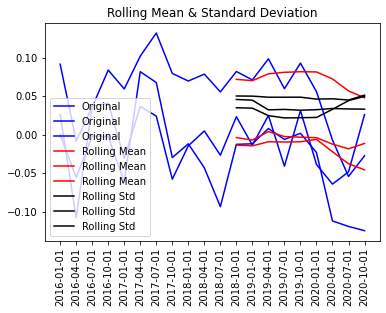

ADF Statistic: -1.8446986406118269
p-value: 0.35850654555354633
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307


In [283]:
rolling_mean_exp_decay = df_log.ewm(halflife=4, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
plt.xticks(rotation=90)
get_stationarity(df_log_exp_decay)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

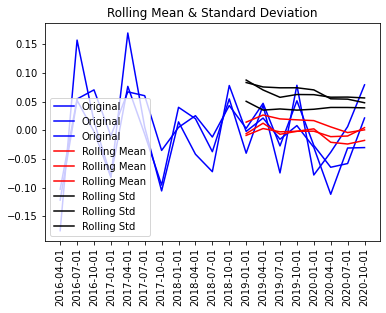

ADF Statistic: -1.8446986406118269
p-value: 0.35850654555354633
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307


In [284]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
plt.xticks(rotation=90)
get_stationarity(df_log_shift)

In [285]:
df_log.head(1)

y  price first difference  price qaurterly difference
ds                                                                     
2015-01-01  6.62894                     NaN                         NaN

In [286]:
df_log.sort_index(inplace=True)

In [287]:

df_log['price first difference']= df_log['y'] - df_log['y'].shift(1)
df_log['price qaurterly difference']= df_log['y'] - df_log['y'].shift(4)
df_log.head()


y  price first difference  price qaurterly difference
ds                                                                      
2015-01-01  6.628940                     NaN                         NaN
2015-04-01  6.647857                0.018917                         NaN
2015-07-01  6.650279                0.002422                         NaN
2015-10-01  6.722786                0.072507                         NaN
2016-01-01  6.795057                0.072271                    0.166116

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

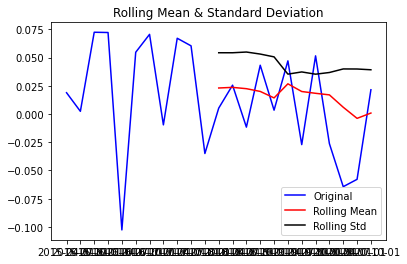

ADF Statistic: -1.8446986406118269
p-value: 0.35850654555354633
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307


In [288]:
#### again test the data stationary 

get_stationarity(df_log['price first difference'].dropna())

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

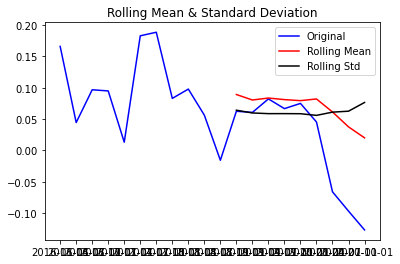

ADF Statistic: -1.8446986406118269
p-value: 0.35850654555354633
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307


In [289]:
get_stationarity(df_log['price qaurterly difference'].dropna())

In [292]:
df_log=df_log.dropna()

In [293]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df_log['price first difference'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                 
====================================================================================
Dep. Variable:     D.price first difference   No. Observations:                   19
Model:                       ARIMA(1, 1, 1)   Log Likelihood                  29.749
Method:                             css-mle   S.D. of innovations              0.046
Date:                      Mon, 29 Mar 2021   AIC                            -51.498
Time:                              16:37:46   BIC                            -47.721
Sample:                          04-01-2016   HQIC                           -50.859
                               - 10-01-2020                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0024      0.001     -1.665      0.096      -0.005       0.000
ar.L1.D.price first difference    -0.2655      0.224     -1.187      0.235      -0.704       0.173
ma.L1.D.price first difference    -0.9999      0.164     -6.100      0.000      -1.321      -0.679
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.7670           +0.0000j            3.7670            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [297]:
df_log_shift

y  price first difference  price qaurterly difference
ds                                                                      
2016-04-01 -0.102675               -0.174946                   -0.121592
2016-07-01  0.054771                0.157446                    0.052349
2016-10-01  0.070635                0.015864                   -0.001873
2017-01-01 -0.009565               -0.080199                   -0.081835
2017-04-01  0.067175                0.076740                    0.169850
2017-07-01  0.060450               -0.006726                    0.005679
2017-10-01 -0.034955               -0.095405                   -0.105590
2018-01-01  0.005262                0.040217                    0.014827
2018-04-01  0.025601                0.020339                   -0.041574
2018-07-01 -0.011587               -0.037188                   -0.072037
2018-10-01  0.043268                0.054855                    0.078223
2019-01-01  0.003437               -0.039831                   -0.001825
2019-04-01  0.047133                0.043696                    0.021532
2019-07-01 -0.027069               -0.074202                   -0.015482
2019-10-01  0.051584                0.078654                    0.008316
2020-01-01 -0.026225               -0.077809                   -0.029662
2020-04-01 -0.064358               -0.038133                   -0.111491
2020-07-01 -0.057837                0.006522                   -0.030767
2020-10-01  0.021547                0.079384                   -0.030037

In [348]:
df_log_shift1=df_log_shift.copy()
df_log_shift1.reset_index()
del df_log_shift1['price first difference']
del df_log_shift1['price qaurterly difference']

In [417]:
df_log_shift1

y
ds                  
2016-04-01 -0.102675
2016-07-01  0.054771
2016-10-01  0.070635
2017-01-01 -0.009565
2017-04-01  0.067175
2017-07-01  0.060450
2017-10-01 -0.034955
2018-01-01  0.005262
2018-04-01  0.025601
2018-07-01 -0.011587
2018-10-01  0.043268
2019-01-01  0.003437
2019-04-01  0.047133
2019-07-01 -0.027069
2019-10-01  0.051584
2020-01-01 -0.026225
2020-04-01 -0.064358
2020-07-01 -0.057837
2020-10-01  0.021547

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


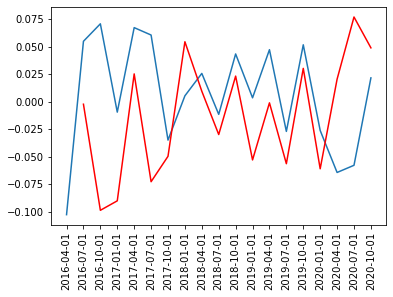

In [351]:

decomposition = seasonal_decompose(x=df_log_shift1['y'], model="additive", extrapolate_trend='freq', period=1) 
model = ARIMA(df_log_shift1, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift1)
plt.xticks(rotation=90)
plt.plot(results.fittedvalues, color='red')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


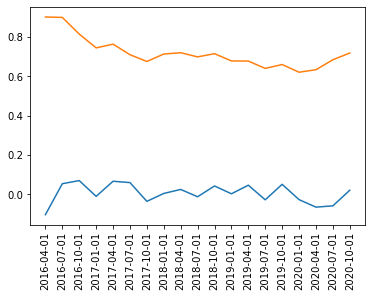

In [354]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log_shift1['y'].iloc[0], index=df_log_shift1.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
plt.xticks(rotation=90)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_log_shift1)
plt.plot(predictions_ARIMA)

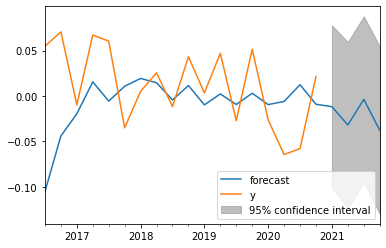

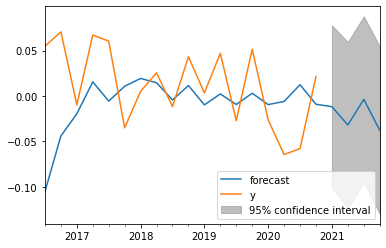

In [362]:
results.plot_predict(1,22)

In [418]:
# del df_2['price first difference']
# del df_2['price qaurterly difference']
df_2.set_index('ds')

y
ds                 
2015-01-01  1250.83
2015-04-01  1711.45
2015-07-01  2034.00
2015-10-01  1860.30
2016-01-01  1572.56
2016-04-01  1660.43
2016-07-01  1689.60
2016-10-01  1692.20
2017-01-01  1856.57
2017-04-01  1666.63
2017-07-01  1882.42
2017-10-01  1737.92
2018-01-01  1799.91
2018-04-01  1563.31
2018-07-01  1849.52
2018-10-01  1615.31
2019-01-01  1732.50
2019-04-01  1746.70
2019-07-01  1950.10
2019-10-01  2023.40
2020-01-01  1626.90
2020-04-01  1822.70
2020-07-01  1932.30
2020-10-01  1577.10

In [419]:
df_2['ds']=pd.to_datetime(df_2['ds'])
df_2=df_2.set_index('ds')

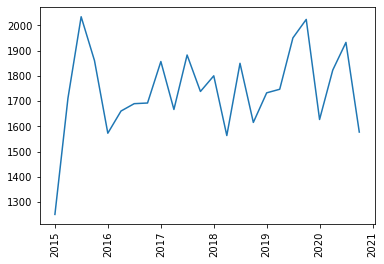

In [420]:
df_2
plt.xticks(rotation=90)
plt.plot(df_2)

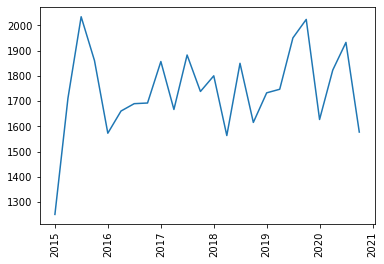

In [421]:
#Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean increases.
df_log2 = np.log(df_2)
plt.xticks(rotation=90)
plt.plot(df_2)

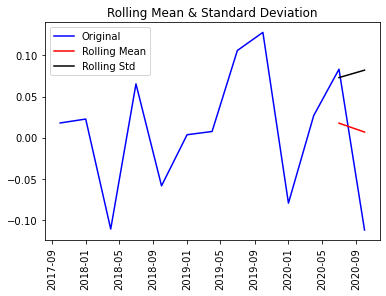

ADF Statistic: -1.8446986406118269
p-value: 0.35850654555354633
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307


In [422]:
rolling_mean2 = df_log2.rolling(window=12).mean()
df_log_minus_mean2 = df_log2 - rolling_mean2
plt.xticks(rotation=90)
get_stationarity(df_log_minus_mean2)

In [401]:
def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
        else:
            print("weak evidence against null hypothesis,indicating it is non-stationary ")




In [404]:
adfuller_test(df_2)

ADF Test Statistic : -5.904230409328185
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
p-value : 2.7325260031169494e-07
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
#Lags Used : 0
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary
Number of Observations : 23
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [406]:
from pmdarima import auto_arima 
  
import warnings 
warnings.filterwarnings("ignore") 
  

stepwise_fit = auto_arima(df_2['y'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=169.759, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=168.303, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=171.757, Time=0.05 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 2.820 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   24
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                 -83.151
Date:                  Mon, 29 Mar 2021   AIC                            168.303
Time:                          18:40:22   BIC                            168.788
Sample:                               0   HQIC                           168.123
                                   - 24                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       6.11e+04   2.77e+04      2.206      0.027    6825.770    1.15e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.77   Prob(JB):                         0.70
Heteroskedasticity (H):               0.25   Skew:                             0.45
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [427]:
df_2

y
ds                 
2015-01-01  1250.83
2015-04-01  1711.45
2015-07-01  2034.00
2015-10-01  1860.30
2016-01-01  1572.56
2016-04-01  1660.43
2016-07-01  1689.60
2016-10-01  1692.20
2017-01-01  1856.57
2017-04-01  1666.63
2017-07-01  1882.42
2017-10-01  1737.92
2018-01-01  1799.91
2018-04-01  1563.31
2018-07-01  1849.52
2018-10-01  1615.31
2019-01-01  1732.50
2019-04-01  1746.70
2019-07-01  1950.10
2019-10-01  2023.40
2020-01-01  1626.90
2020-04-01  1822.70
2020-07-01  1932.30
2020-10-01  1577.10

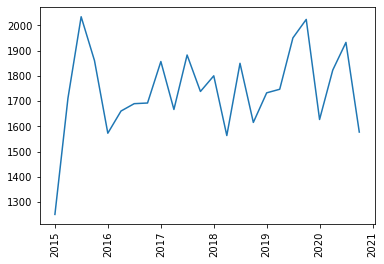

In [437]:
df_log2 = np.log(df_2)
plt.xticks(rotation=90)
plt.plot(df_2)

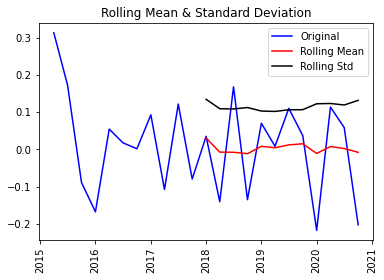

ADF Statistic: -1.8446986406118269
p-value: 0.35850654555354633
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307


In [477]:
df_log_shift2 = df_log2 - df_log2.shift()
df_log_shift2.dropna(inplace=True)
plt.xticks(rotation=90)
get_stationarity(df_log_shift2)

In [478]:
# df_log_shift2=df_log_shift2.set_index('ds')
df_log_shift2

y
ds                  
2015-04-01  0.313534
2015-07-01  0.172663
2015-10-01 -0.089267
2016-01-01 -0.168033
2016-04-01  0.054372
2016-07-01  0.017415
2016-10-01  0.001538
2017-01-01  0.092701
2017-04-01 -0.107927
2017-07-01  0.121755
2017-10-01 -0.079869
2018-01-01  0.035048
2018-04-01 -0.140931
2018-07-01  0.168121
2018-10-01 -0.135399
2019-01-01  0.070039
2019-04-01  0.008163
2019-07-01  0.110152
2019-10-01  0.036899
2020-01-01 -0.218103
2020-04-01  0.113643
2020-07-01  0.058392
2020-10-01 -0.203123

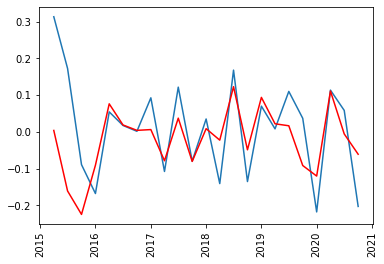

In [491]:
decomposition = seasonal_decompose(x=df_log_shift2['y'], model="additive", extrapolate_trend='freq', period=1) 
model = ARIMA(df_log_shift2, order=(1,0,1))
results2 = model.fit(disp=-1)
plt.plot(df_log_shift2)
plt.xticks(rotation=90)
plt.plot(results2.fittedvalues, color='red')

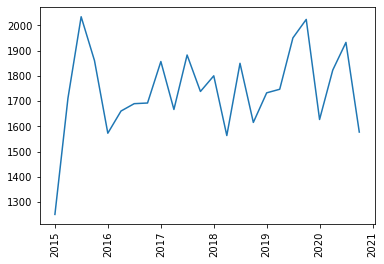

In [492]:
predictions_ARIMA_diff2 = pd.Series(results2.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff2.cumsum()
predictions_ARIMA_log2 = pd.Series(df_2['y'].iloc[0], index=df_2.index)
predictions_ARIMA_log2 = predictions_ARIMA_log2.add(predictions_ARIMA_diff_cumsum, fill_value=0)
plt.xticks(rotation=90)
predictions_ARIMA2 = np.exp(predictions_ARIMA_log2)
plt.plot(df_2)
plt.plot(predictions_ARIMA2)

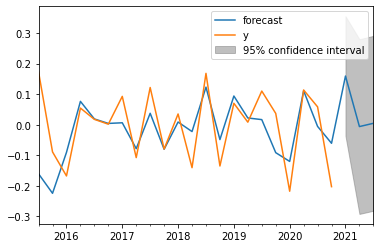

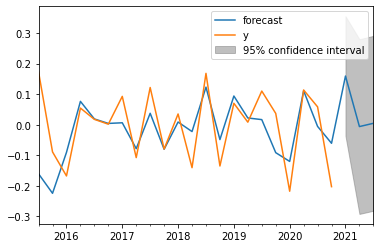

In [497]:
results2.plot_predict(1,25)

In [505]:
results2

In [500]:
from sklearn.metrics import mean_squared_error

In [507]:
del df_1['price first difference']
del df_1['price qaurterly difference']

In [510]:
df_1['ds']=pd.to_datetime(df_1['ds'])

In [511]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

test_length =4
elbarri_train = df_1.iloc[:-test_length]
elbarri_test = df_1.iloc[-test_length:]
pedralbes_train= df_2.iloc[:-test_length]
peralbes_test = df_2.iloc[-test_length:]


In [516]:
elbarri_test

neighbourhood_name  price_month(€)  price_m2_month(€)  \
quarter                                                            
2020-01-01     el Barri Gòtic          1110.2               14.2   
2020-04-01     el Barri Gòtic          1041.0               13.4   
2020-07-01     el Barri Gòtic           982.5               13.6   
2020-10-01     el Barri Gòtic          1003.9               13.1   

            bachelors degree  airbnb_professional_ratio  \
quarter                                                   
2020-01-01            6589.0                   0.245335   
2020-04-01            6589.0                   0.262894   
2020-07-01            6589.0                   0.255864   
2020-10-01            6589.0                   0.274733   

            airbnb_mega_host_ratio  airbnb_ratio_business  neighbourhood_code  \
quarter                                                                         
2020-01-01                0.078093               0.420871                 2.0   
2020-04-01                0.078797               0.413324                 2.0   
2020-07-01                0.085999               0.439232                 2.0   
2020-10-01                0.096085               0.447687                 2.0   

            district_code  airbnb_price(€)  1 foreigner  \
quarter                                                   
2020-01-01            1.0       100.394610       1663.0   
2020-04-01            1.0       136.280086       1663.0   
2020-07-01            1.0       105.008529       1663.0   
2020-10-01            1.0        82.959431       1663.0   

            long-term unemployment  n_airbnb_listings  no education  \
quarter                                                               
2020-01-01                  4304.0             1447.0         360.0   
2020-04-01                  4304.0             1396.0         360.0   
2020-07-01                  4304.0             1407.0         360.0   
2020-10-01                  4304.0             1405.0         360.0   

            availability_365  1 Spanish  
quarter                                  
2020-01-01        180.958535     2234.0  
2020-04-01        207.419771     2234.0  
2020-07-01        184.250178     2234.0  
2020-10-01        186.430605     2234.0

In [ ]:
def difference(dataset, interval=1):
diff = list()
for i in range(interval, len(dataset)):
value = dataset[i] - dataset[i - interval]
diff.append(value)
return numpy.array(diff)